In [243]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
%config InlineBackend.figure_formats = ['svg']

In [244]:
def buildAndTrainTheModel(x,y, learning_rate, epochs):

  # build the model
  ANNreg = nn.Sequential(
      nn.Linear(1,1),  # input layer
      nn.ReLU(),       # activation function
      nn.Linear(1,1)   # output layer
      )

  mse = nn.MSELoss()
  optimizer = torch.optim.SGD(ANNreg.parameters(), lr=learning_rate)
  losses = torch.zeros(epochs)


  for epoch in range(epochs):
    _y_pred = ANNreg(x)
    _loss = mse(_y_pred, y)

    losses[epoch] = _loss

    optimizer.zero_grad()
    _loss.backward()
    optimizer.step()
  
  y_pred = ANNreg(x)
  return y_pred, losses
  



In [263]:
def createTheData(m):
  N = 50
  x = torch.randn(N,1)
  y = m*x + torch.randn(N,1)/2
  return x,y

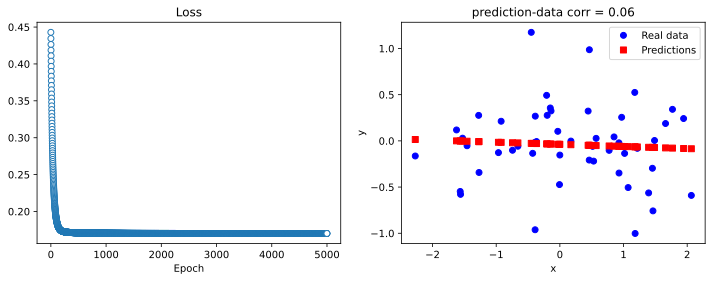

In [266]:
# create a dataset
x,y = createTheData(0)

# run the model
yHat,losses = buildAndTrainTheModel(x,y,.005, epochs=5000)
yHat = yHat.detach()

fig,ax = plt.subplots(1,2,figsize=(12,4))

ax[0].plot(losses.detach(),'o',markerfacecolor='w',linewidth=.1)
ax[0].set_xlabel('Epoch')
ax[0].set_title('Loss')

ax[1].plot(x,y,'bo',label='Real data')
ax[1].plot(x,yHat,'rs',label='Predictions')
ax[1].set_xlabel('x')
ax[1].set_ylabel('y')
ax[1].set_title(f'prediction-data corr = {np.corrcoef(y.T,yHat.T)[0,1]:.2f}')
ax[1].legend()

plt.show()

In [ ]:
slopes = np.linspace(-2,2,21)

iteration = 50

results = np.zeros((len(slopes), iteration, 2))

for i in range(len(slopes)):
    for j in range(iteration):
        x, y = createTheData(slopes[i])
        y_hat, loss = buildAndTrainTheModel(x, y, .05, 500)
        y_hat = y_hat.detach()

        results[i, j, 0] = loss[-1]
        results[i, j, 1] = np.corrcoef(y.T, y_hat.T)[0, 1]

# correlation can be 0 if the model didn't do well. Set nan's->0
results[np.isnan(results)] = 0

/Users/grexrr/Desktop/code-learning-ai/.venv/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/grexrr/Desktop/code-learning-ai/.venv/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


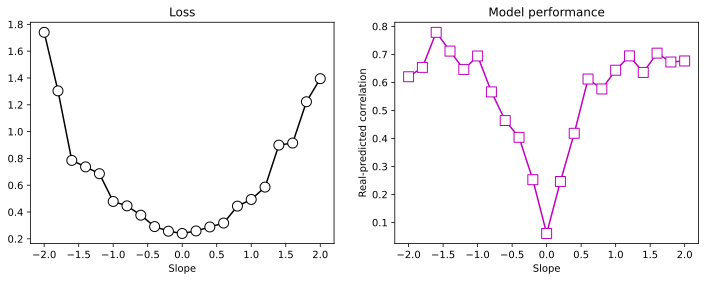

In [249]:
# plot the results!

fig,ax = plt.subplots(1,2,figsize=(12,4))

ax[0].plot(slopes,np.mean(results[:,:,0],axis=1),'ko-',markerfacecolor='w',markersize=10)
ax[0].set_xlabel('Slope')
ax[0].set_title('Loss')

ax[1].plot(slopes,np.mean(results[:,:,1],axis=1),'ms-',markerfacecolor='w',markersize=10)
ax[1].set_xlabel('Slope')
ax[1].set_ylabel('Real-predicted correlation')
ax[1].set_title('Model performance')

plt.show()

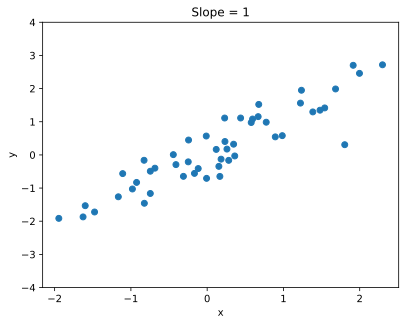

In [262]:
# extra code to visualize data with different slopes

m = 1

x,y = createTheData(m)

plt.title('Slope = ' + str(m))
plt.plot(x,y,'o')
plt.ylim([-4,4])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [267]:

if torch.backends.mps.is_available():
    mps_device = torch.device("mps")
    x = torch.ones(1, device=mps_device)
    print (x)
else:
    print ("MPS device not found.")

tensor([1.], device='mps:0')
